### Importação dos dados



In [125]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [126]:
# Incluindo uma coluna identificando cada loja
loja["Loja_id"] = 'Loja 1'
loja2["Loja_id"] = 'Loja 2'
loja3["Loja_id"] = 'Loja 3'
loja4["Loja_id"] = 'Loja 4'
df = df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index = True)

In [127]:
df = df[['Loja_id', 'Categoria do Produto', 'Produto', 'Preço', 'Frete', 'Avaliação da compra']]

In [128]:
df['Categoria do Produto'] = df['Categoria do Produto'].str.capitalize()

/tmp/ipython-input-1204606595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Categoria do Produto'] = df['Categoria do Produto'].str.capitalize()


In [129]:
df.head()

,Loja_id,Categoria do Produto,Produto,Preço,Frete,Avaliação da compra
0,Loja 1,Eletronicos,Assistente virtual,219.08,9.249790,4
1,Loja 1,Moveis,Mesa de jantar,256.35,11.234305,1
2,Loja 1,Brinquedos,Jogo de tabuleiro,279.51,21.262681,1
3,Loja 1,Eletrodomesticos,Micro-ondas,1009.99,54.667344,4
4,Loja 1,Moveis,Cadeira de escritório,446.99,26.964689,5


#1. Análise do faturamento



In [130]:
def calcular_faturamento(df):
    # Agrupa por Loja_id e soma a coluna Preço
    return df.groupby('Loja_id')['Preço'].sum()

faturamento_total = calcular_faturamento(df_lojas)
em_mi = faturamento_total/1000000
em_mi


,Preço
Loja_id,
Loja 1,1.534509
Loja 2,1.488459
Loja 3,1.464025
Loja 4,1.384498


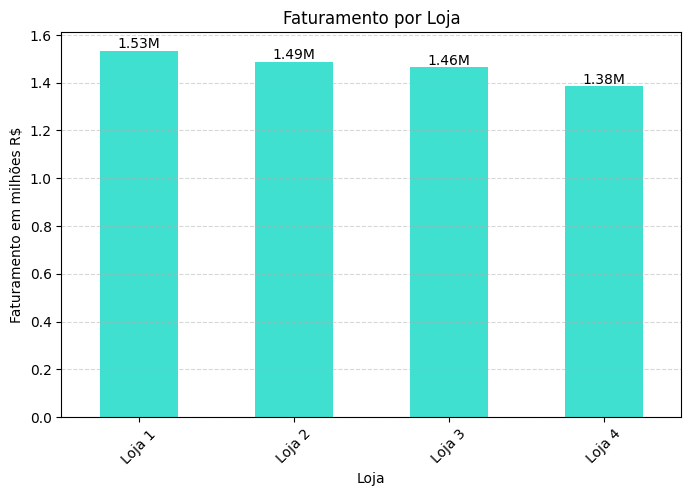

In [131]:
ax = em_mi.plot(kind = 'bar', figsize = (8, 5), color = 'turquoise', xlabel = 'Loja', ylabel = 'Faturamento em milhões R$', title = 'Faturamento por Loja', rot = 45)
ax.bar_label(ax.containers[0], fmt='%.2f'+ 'M')
plt.grid(axis='y', linestyle='--', alpha=0.5)


# 2. Vendas por Categoria

In [132]:
df_lojas['Categoria do Produto'].unique()

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

In [133]:
vendas_por_categoria = df.groupby(['Loja_id', 'Categoria do Produto'])['Preço'].sum()
display(vendas_por_categoria)


Loja_id  Categoria do Produto 
Loja 1   Brinquedos                23993.78
         Eletrodomesticos         484913.36
         Eletronicos              572659.23
         Esporte e lazer           52387.55
         Instrumentos musicais    121731.69
         Livros                    11713.92
         Moveis                   250178.11
         Utilidades domesticas     16931.48
Loja 2   Brinquedos                21262.21
         Eletrodomesticos         464758.13
         Eletronicos              547773.71
         Esporte e lazer           46326.09
         Instrumentos musicais    139987.03
         Livros                    13454.35
         Moveis                   235234.68
         Utilidades domesticas     19662.86
Loja 3   Brinquedos                25869.20
         Eletrodomesticos         438984.89
         Eletronicos              547699.92
         Esporte e lazer           47456.10
         Instrumentos musicais    103174.45
         Livros                    12664.70
         Moveis                   268095.56
         Utilidades domesticas     20080.21
Loja 4   Brinquedos                27015.67
         Eletrodomesticos         377680.65
         Eletronicos              545966.86
         Esporte e lazer           44465.65
         Instrumentos musicais    100136.50
         Livros                    12427.77
         Moveis                   256705.65
         Utilidades domesticas     20098.83
Name: Preço, dtype: float64

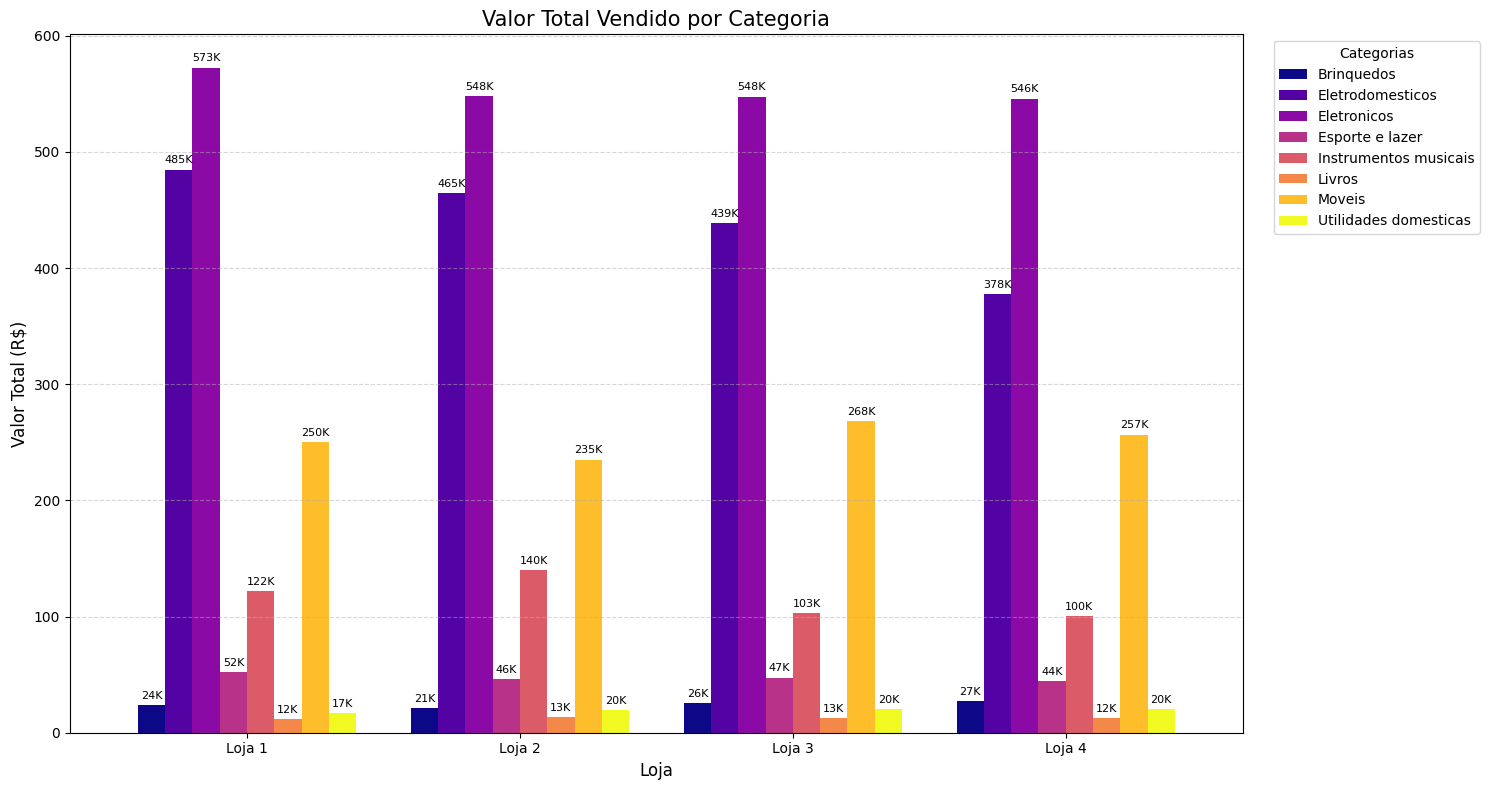

In [134]:
import matplotlib.pyplot as plt

# 1. Somar o valor total (Preço) de cada categoria por loja
vendas_por_categoria_valor = df.groupby(['Loja_id', 'Categoria do Produto'])['Preço'].sum().unstack(fill_value=0)
vendas_por_categoria_valor = vendas_por_categoria_valor/1000
# 2. Gerar o gráfico de barras agrupadas
ax = vendas_por_categoria_valor.plot(kind='bar', figsize=(15, 8), width=0.8, colormap='plasma')


# 3. Customização visual
plt.title('Valor Total Vendido por Categoria', fontsize=15)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Valor Total (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Categorias', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionando os valores sobre as barras (arredondados para facilitar a leitura)
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=8, fmt='%.0f' + 'K')

plt.tight_layout()
plt.show()

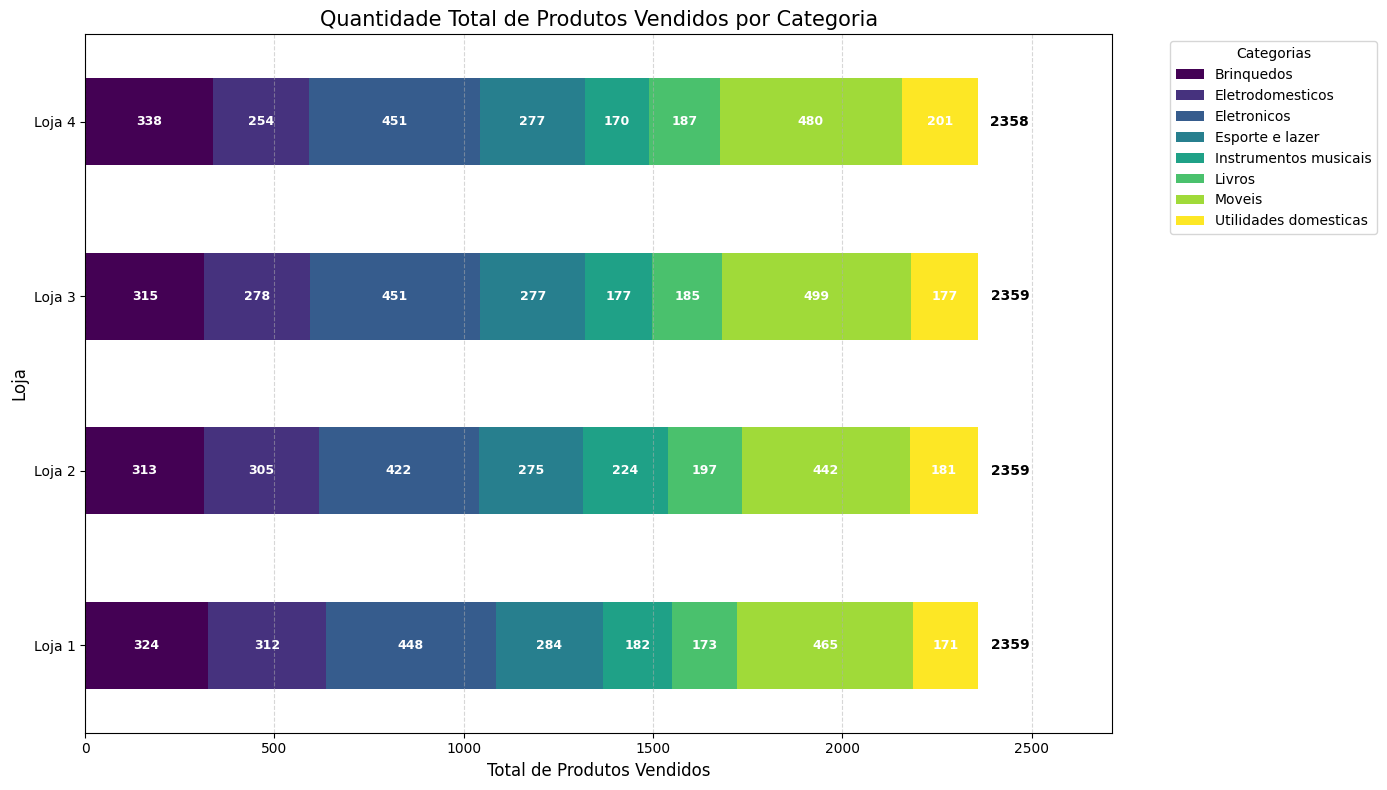

In [155]:
import matplotlib.pyplot as plt

# Calculando a quantidade de vendas por categoria em cada loja
quantidade_por_categoria = df.groupby(['Loja_id', 'Categoria do Produto']).size().unstack(fill_value=0)

# Criando o gráfico de barras horizontais empilhadas
ax = quantidade_por_categoria.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='viridis')

# Customização do gráfico
plt.title('Quantidade Total de Produtos Vendidos por Categoria', fontsize=15)
plt.ylabel('Loja', fontsize=12)
plt.xlabel('Total de Produtos Vendidos', fontsize=12)
plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 1. Adicionando rótulos com o valor de cada segmento dentro da barra
for rect in ax.patches:
    width = rect.get_width()
    if width > 0:
        x_pos = rect.get_x() + width / 2
        y_pos = rect.get_y() + rect.get_height() / 2
        ax.text(x_pos, y_pos, int(width), ha='center', va='center', fontsize=9, color='white', fontweight='bold')

# 2. Adicionando a soma total ao final de cada barra horizontal
totais_por_loja = quantidade_por_categoria.sum(axis=1)
for i, total in enumerate(totais_por_loja):
    # Colocamos o texto um pouco à frente da barra total (total + offset)
    ax.text(total + 20, i, f' {int(total)}', va='center', fontsize=10, fontweight='bold', color='black')

# Ajustando o limite do eixo X para que o texto do total não seja cortado
plt.xlim(0, totais_por_loja.max() * 1.15)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [136]:
df.head()

,Loja_id,Categoria do Produto,Produto,Preço,Frete,Avaliação da compra
0,Loja 1,Eletronicos,Assistente virtual,219.08,9.249790,4
1,Loja 1,Moveis,Mesa de jantar,256.35,11.234305,1
2,Loja 1,Brinquedos,Jogo de tabuleiro,279.51,21.262681,1
3,Loja 1,Eletrodomesticos,Micro-ondas,1009.99,54.667344,4
4,Loja 1,Moveis,Cadeira de escritório,446.99,26.964689,5


In [137]:
def calcular_media_avaliacao(df):
    # Calcula a média de avaliação agrupada por loja
    return df.groupby('Loja_id')['Avaliação da compra'].mean().round(2)

media_avaliacoes = calcular_media_avaliacao(df)
display(media_avaliacoes)

,Avaliação da compra
Loja_id,
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


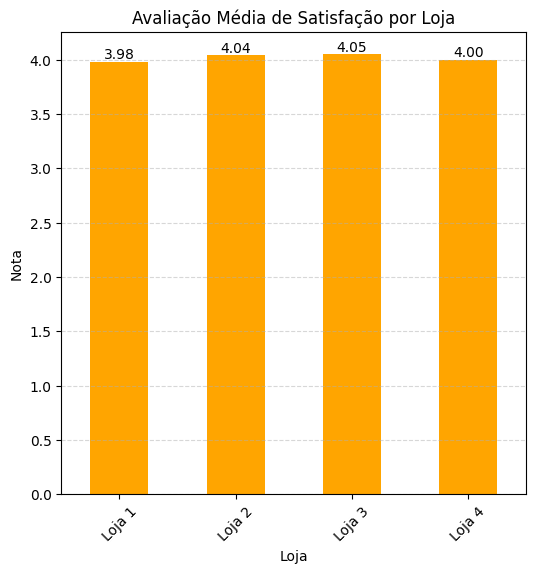

In [138]:
ax = media_avaliacoes.plot(kind = 'bar', figsize = (6, 6), color = 'orange', xlabel = 'Loja', ylabel = 'Nota', rot = 45, title = 'Avaliação Média de Satisfação por Loja')
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 4. Produtos Mais e Menos Vendidos

In [139]:
# Para ver a contagem de cada produto (mais vendidos para menos vendidos)
contagem = df.groupby('Loja_id')['Produto'].value_counts()
contagem


Loja_id  Produto           
Loja 1   Guarda roupas         60
         Micro-ondas           60
         TV Led UHD 4K         60
         Secadora de roupas    58
         Blocos de montar      56
                               ..
Loja 4   Geladeira             38
         Lavadora de roupas    38
         Violão                37
         Guarda roupas         34
         Guitarra              33
Name: count, Length: 204, dtype: int64

In [140]:

# Filtrando o mais vendido (primeiro da lista de cada loja) e o menos vendido (último)
mais_vendidos = contagem.groupby(level=0).head(1)
menos_vendidos = contagem.groupby(level=0).tail(1)

print("--- Mais Vendidos ---")
display(mais_vendidos)

print("\n--- Menos Vendidos ---")
display(menos_vendidos)

--- Mais Vendidos ---


,,count
Loja_id,Produto,
Loja 1,Guarda roupas,60
Loja 2,Iniciando em programação,65
Loja 3,Kit banquetas,57
Loja 4,Cama box,62



--- Menos Vendidos ---


,,count
Loja_id,Produto,
Loja 1,Headset,33
Loja 2,Jogo de tabuleiro,32
Loja 3,Blocos de montar,35
Loja 4,Guitarra,33


# 5. Frete Médio por Loja

In [141]:
df.head()

,Loja_id,Categoria do Produto,Produto,Preço,Frete,Avaliação da compra
0,Loja 1,Eletronicos,Assistente virtual,219.08,9.249790,4
1,Loja 1,Moveis,Mesa de jantar,256.35,11.234305,1
2,Loja 1,Brinquedos,Jogo de tabuleiro,279.51,21.262681,1
3,Loja 1,Eletrodomesticos,Micro-ondas,1009.99,54.667344,4
4,Loja 1,Moveis,Cadeira de escritório,446.99,26.964689,5


In [142]:
def calcular_frete_medio(df):
    # Calcula o frete médio agrupado por loja e arredonda para 2 casas
    return df.groupby('Loja_id')['Frete'].mean().round(2)

frete_medio_lojas = calcular_frete_medio(df_lojas)
display(frete_medio_lojas)

,Frete
Loja_id,
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


In [143]:
df.isnull().sum()

,0
Loja_id,0
Categoria do Produto,0
Produto,0
Preço,0
Frete,0
Avaliação da compra,0


In [157]:
df.head()

,Loja_id,Categoria do Produto,Produto,Preço,Frete,Avaliação da compra
0,Loja 1,Eletronicos,Assistente virtual,219.08,9.249790,4
1,Loja 1,Moveis,Mesa de jantar,256.35,11.234305,1
2,Loja 1,Brinquedos,Jogo de tabuleiro,279.51,21.262681,1
3,Loja 1,Eletrodomesticos,Micro-ondas,1009.99,54.667344,4
4,Loja 1,Moveis,Cadeira de escritório,446.99,26.964689,5


In [158]:
df.to_csv('dados_alura_store_br.csv', index = False, sep = ",")